In [5]:
# Jupyter magic
%run ../util/dependencies.py

# Load the raw data as dataframe
file_path = '../data/pscp_01_raw.csv'
pscp = pd.read_csv(file_path)

# set visual style for plots during exploration
sns.set_palette('rocket')
sns.set_style("darkgrid")
plt.style.use("dark_background")

### Planetary Systems - Basic Exploration

In [6]:
print('=====================================')
print('\tPLANETARY SYSTEMS DB')
print('=====================================')


print('\n~~~~~~~~~~~~~~~~~')
print('Info')
print('~~~~~~~~~~~~~~~~~')
print(pscp.info())

print('\n~~~~~~~~~~~~~~~~~')
print('Head')
print('~~~~~~~~~~~~~~~~~')
print(pscp.head())

print('\n~~~~~~~~~~~~~~~~~')
print('Description')
print('~~~~~~~~~~~~~~~~~')
print(pscp.describe())

print('\n~~~~~~~~~~~~~~~~~')
print('Missing Values')
print('~~~~~~~~~~~~~~~~~')
for col in pscp.columns:
    per_missing = pscp[col].isnull().sum() / len(pscp) * 100
    print(f'{col}: {per_missing:.2f}% missing values')

print('\n~~~~~~~~~~~~~~~~~')
print('Value Counts')
print('~~~~~~~~~~~~~~~~~')
for col in pscp:
    print(pscp[col].value_counts())

	PLANETARY SYSTEMS DB

~~~~~~~~~~~~~~~~~
Info
~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6065 entries, 0 to 6064
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6065 non-null   int64  
 1   pl_controv_flag  6065 non-null   int64  
 2   pl_name          6065 non-null   object 
 3   hostname         6065 non-null   object 
 4   pl_letter        6065 non-null   object 
 5   sy_snum          6065 non-null   int64  
 6   discoverymethod  6065 non-null   object 
 7   disc_year        6065 non-null   int64  
 8   pl_radj          6015 non-null   float64
 9   pl_massj         2290 non-null   float64
 10  st_spectype      2250 non-null   object 
 11  st_rad           5767 non-null   float64
 12  st_mass          6058 non-null   float64
 13  st_met           5532 non-null   float64
 14  st_lum           5773 non-null   float64
 15  st_teff          5789 non-null   float64
 

Lots of null values in the following features:
- `pl_massj` -> ~62.24% NULL
- `st_spectype` -> ~62.90% NULL

This could potentially be a consequence of survey methods? Transit observations lean heavily on visual information while radial velocity surveys are dependent on mass analysis. Lets see if there is a line of logic here to explain this discrepancy. . .

/tmp/ipykernel_59511/3007095672.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="discoverymethod", y="pl_massj_is_null", data=tempdf, palette='rocket')


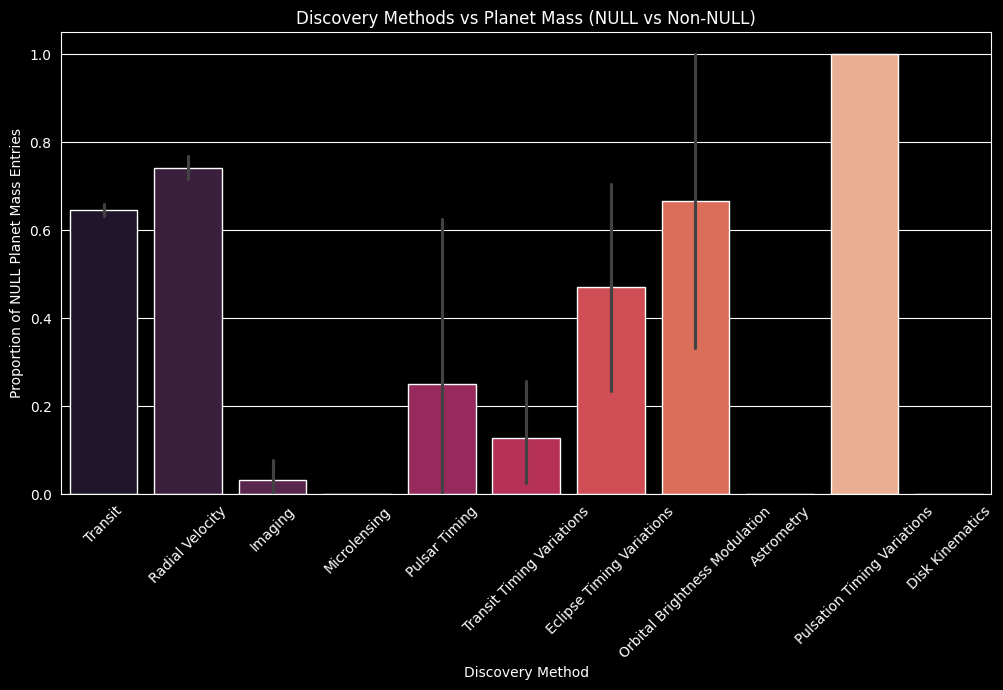

In [7]:
# bar graph of discovery methods vs pl_massj NULL and non-NULL counts
tempdf = pscp[['discoverymethod', 'pl_massj']].copy()
tempdf["pl_massj_is_null"] = tempdf["pl_massj"].isnull().astype(int)

plt.figure(figsize=(12, 6))
sns.barplot(x="discoverymethod", y="pl_massj_is_null", data=tempdf, palette='rocket')
plt.title('Discovery Methods vs Planet Mass (NULL vs Non-NULL)')
plt.xlabel('Discovery Method')
plt.ylabel('Proportion of NULL Planet Mass Entries')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_59511/1971055209.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="discoverymethod", y="st_spectype_is_null", data=tempdf, palette='rocket')


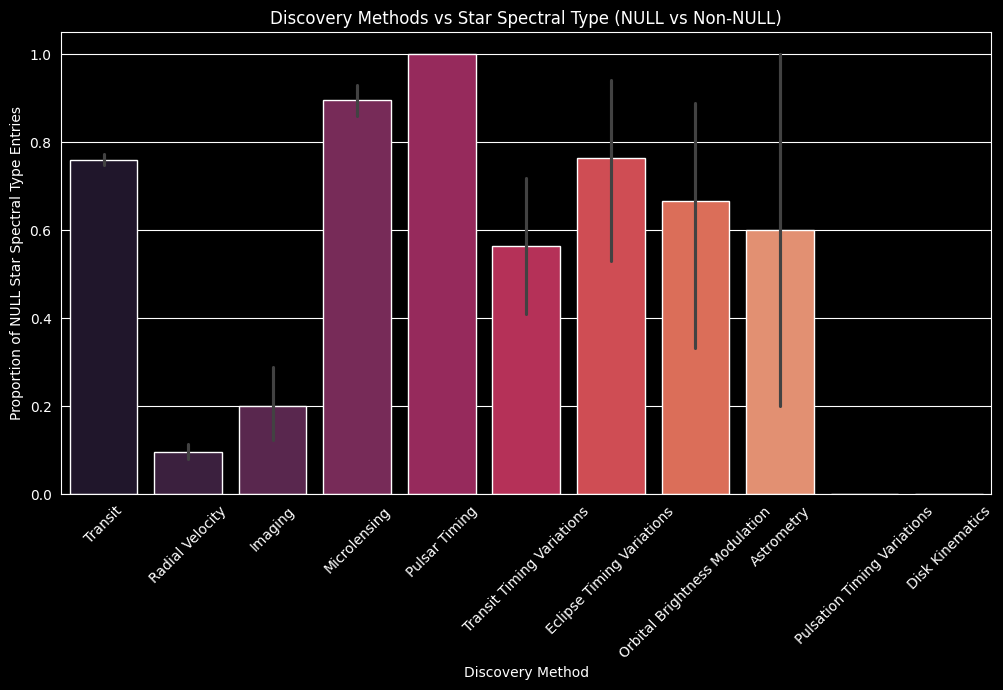

In [8]:
# bar graph of discovery methods vs st_spectype NULL and non-NULL counts
tempdf = pscp[['discoverymethod', 'st_spectype']].copy()
tempdf["st_spectype_is_null"] = tempdf["st_spectype"].isnull().astype(int)

plt.figure(figsize=(12, 6))
sns.barplot(x="discoverymethod", y="st_spectype_is_null", data=tempdf, palette='rocket')
plt.title('Discovery Methods vs Star Spectral Type (NULL vs Non-NULL)')
plt.xlabel('Discovery Method')
plt.ylabel('Proportion of NULL Star Spectral Type Entries')
plt.xticks(rotation=45)
plt.show()

Further analysis to determine how to handle the null values in the analysis . . .

In [9]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('DISTRIBUTION OF DISCOVERY METHODS')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
count_disc_meth = dict(pscp['discoverymethod'].value_counts())
for method, count in count_disc_meth.items():
    print(f'{method}: {count} discoveries, {count/len(pscp)*100:.2f}%')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DISTRIBUTION OF DISCOVERY METHODS
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Transit: 4474 discoveries, 73.77%
Radial Velocity: 1158 discoveries, 19.09%
Microlensing: 262 discoveries, 4.32%
Imaging: 90 discoveries, 1.48%
Transit Timing Variations: 39 discoveries, 0.64%
Eclipse Timing Variations: 17 discoveries, 0.28%
Orbital Brightness Modulation: 9 discoveries, 0.15%
Pulsar Timing: 8 discoveries, 0.13%
Astrometry: 5 discoveries, 0.08%
Pulsation Timing Variations: 2 discoveries, 0.03%
Disk Kinematics: 1 discoveries, 0.02%


## Exoplanets and Their Stars

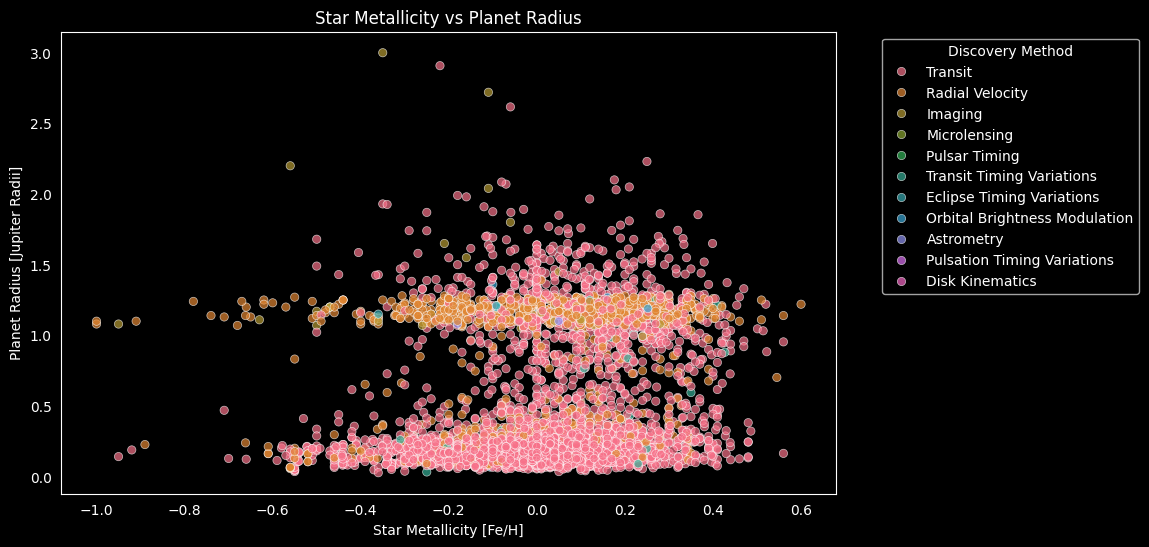

In [10]:
# this anxample analysis of star metallicity vs planet radius
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pscp, x='st_met', y='pl_radj', hue='discoverymethod', alpha=0.7)
plt.title('Star Metallicity vs Planet Radius')
plt.xlabel('Star Metallicity [Fe/H]')
plt.ylabel('Planet Radius [Jupiter Radii]')
plt.legend(title='Discovery Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

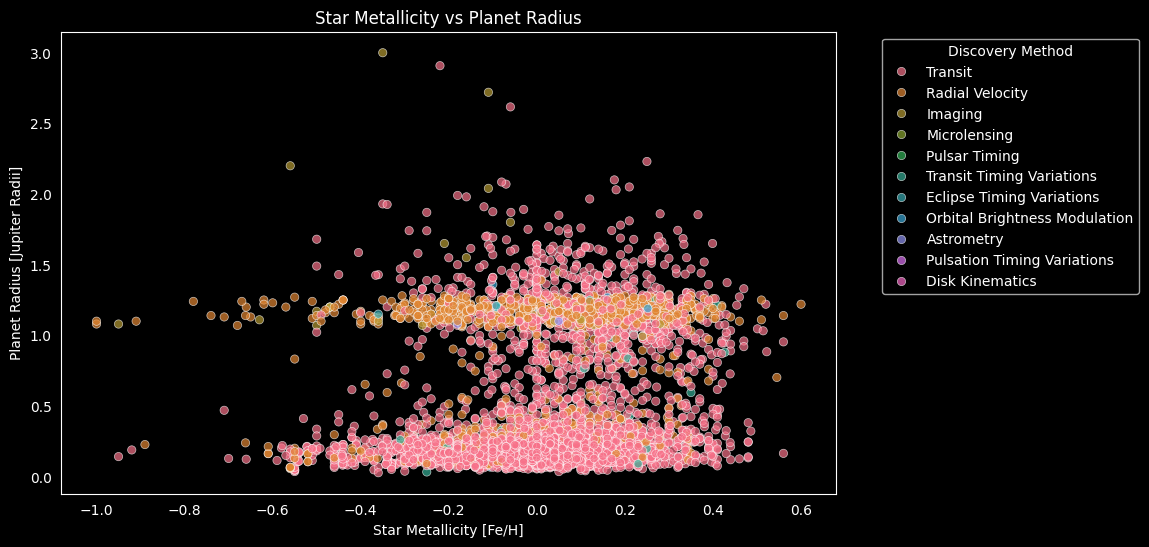

In [11]:
# this anxample analysis of star metallicity vs planet radius
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pscp, x='st_met', y='pl_radj', hue='discoverymethod', alpha=0.7)
plt.title('Star Metallicity vs Planet Radius')
plt.xlabel('Star Metallicity [Fe/H]')
plt.ylabel('Planet Radius [Jupiter Radii]')
plt.legend(title='Discovery Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [ ]:
# Scatterplot of star size vs 

In [ ]:
# Exoplanets vs star metallicity

## Data Cleaning

### Define missing spectral types
As seen above, most stars are not defined by a sepctral type (in fact, this is the case for 62.90% of exoplanet host stars observed). Without this information, it would be impossible to define how certain observation types favor one type of star over another.

Star classifications, however, can be defined by primarily by temperature (something that is available to us in this analysis). The Morgan-Keenan classification system (the standard for clasiffying stars) is defined as follows:
- O: > 30,000 K
- B: 10,000–30,000 K
- A: 7,500–10,000 K
- F: 6,000–7,500 K
- G: 5,200–6,000 K (the Sun is G2V)
- K: 3,900–5,200 K
- M: < 3,900 K

with subclasses (as indicated by a number 0-9) identifying different steps within a major classification.

Additionally, the lumonocity class is defined as follows:
- I = supergiants
- II = bright giants
- III = giants
- IV = subgiants
- V = main sequence

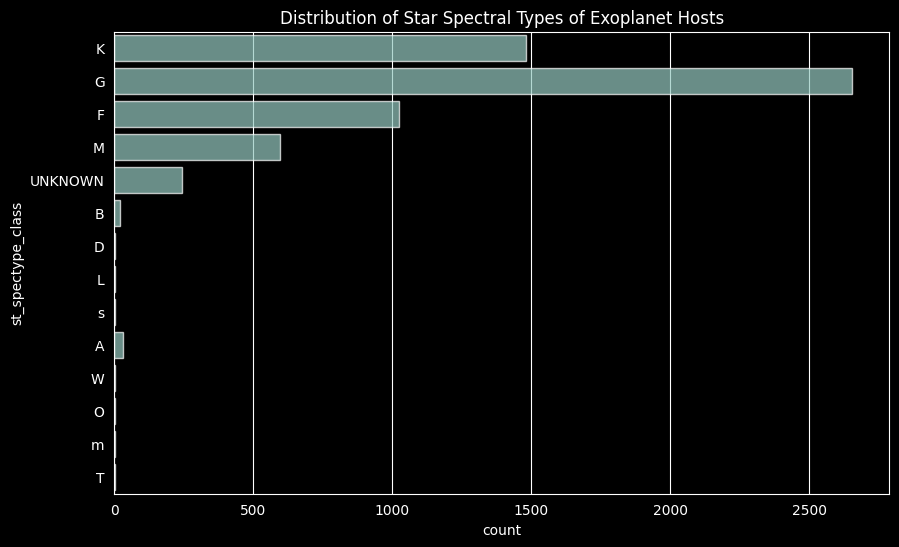

In [12]:
# Create new feature for first character of st_spectype
pscp['st_spectype_class'] = pscp['st_spectype'].astype(str).str[0]

# Method for defining specteral type based on star temperature ranges
def fix_spectype(row):
    # spectype already . . .
    if not pd.isnull(row["st_spectype"]):
        return row["st_spectype"][0]
    # else, assign based on temperatures. . .
    elif pd.isnull(row["st_spectype"]) and row['st_teff'] > 30000:
        return "O"
    elif pd.isnull(row["st_spectype"]) and 10000 < row['st_teff'] <= 30000:
        return "B"
    elif pd.isnull(row["st_spectype"]) and 7500 < row['st_teff'] <= 10000:
        return "A"
    elif pd.isnull(row["st_spectype"]) and 6000 < row['st_teff'] <= 7500:
        return "F"
    elif pd.isnull(row["st_spectype"]) and 5200 < row['st_teff'] <= 6000:
        return "G"
    elif pd.isnull(row["st_spectype"]) and 3700 < row['st_teff'] <= 5200:
        return "K"
    elif pd.isnull(row["st_spectype"]) and row['st_teff'] <= 3700:
        return "M"
    # if no temp value and no spectype . . . 
    else:
        return "UNKNOWN"

pscp["st_spectype_class"] = pscp.apply(fix_spectype, axis=1)

# Output results before defining spectype for null values (that can be classified)
plt.figure(figsize=(10,6))
sns.countplot(data=pscp['st_spectype_class'], alpha=0.7)
plt.title('Distribution of Star Spectral Types of Exoplanet Hosts')
plt.show()


Verified that stars have been classified accordingly, now dropping the values (~4% of dataset) that cannot be utilized for my analysis based off of specular classification as well as by temperature alone. This is statistically insignifigant.

In [13]:
# Drop insignifigant rows
pscp = pscp[pscp['st_spectype_class'] != "UNKNOWN"]

# Verify
total_records = len(pscp)
c_n_star_temp_and_type = pscp["st_spectype_class"].value_counts().get("UNKNOWN", 0) # had to fix this to get a safe return (should be 0)
print(f'{(c_n_star_temp_and_type / total_records) * 100}% of dataset contains host stars that cannot be classified.')

0.0% of dataset contains host stars that cannot be classified.


## Analyze

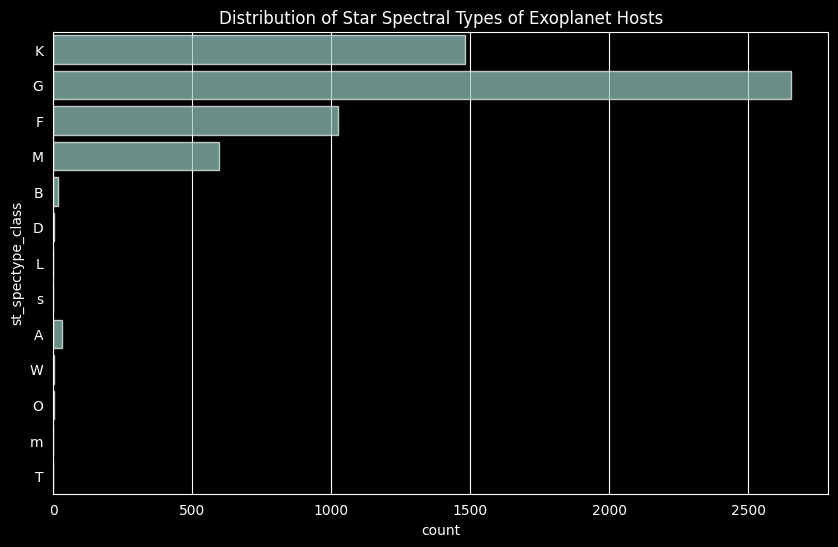

In [14]:
# Output results after defining spectype for null values (that can be classified)
plt.figure(figsize=(10,6))
sns.countplot(data=pscp['st_spectype_class'], alpha=0.7)
plt.title('Distribution of Star Spectral Types of Exoplanet Hosts')
plt.show()

As compared to what I would expect from these analyses, there is a bias in exoplanet hosts toward G-type stars (those most similiar to the Sun). This could be in part due to the Kepler space-telescope's mission of finding exoplanets which were presumed to be found primarily around Sun-like stars. Stars studied most deeply typically have the following features:
1. Bright
2. Nearby
3. Sun-like
4. Spectroscopically well‑characterized

The consequence of this is that M-type (the most common star type) are not represented as much as I would figure they would be, given how common they are. What has yet to be considered, however, is whether the distribution of stars found to host exoplanets is a consequence of which of these factors:
1. Observational methods favoring star types
2. Exoplanets typically forming around these star types
3. 